In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
from astropy.io import fits as f
import sunpy
from scipy.io import readsav

In [2]:
#!pip install git+https://github.com/mdruett/COCOPLOT

In [3]:
import cocopy as cp

<h2>Halpha</h2>

In [4]:
openfile="nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits"
datacube6563=f.getdata(openfile)
print(np.shape(datacube6563))
spectfile="spectfile6563_93.idlsave"
wavefile6563=readsav(spectfile, verbose=False)
wavel6563=wavefile6563.spect_pos
print(wavel6563)

(201, 1, 13, 1200, 1287)
[6561.49999988 6562.         6562.19999999 6562.39999998 6562.69999999
 6562.84999999 6563.         6563.15000001 6563.30000001 6563.60000002
 6563.80000001 6564.         6564.50000012]


 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


Create cocoplot filters

In [5]:
wavelengths = np.arange(np.shape(datacube6563)[2])
print(wavelengths)
sig6563=wavel6563[1]-wavel6563[0]
filt = cp.filter(wavelengths, 'normal', [[10,1.25], [6,1], [2,1.25]])
print(np.shape(filt))
cp.filtplot(datacube6563[0,0,:,600,600], filt)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
(13, 3)


<IPython.core.display.Javascript object>

In [6]:
datacube6563=f.getdata("nb_6563_2017-09-06T11_55_47_scans=3-215_im.fits")
filt2= cp.filter(wavel6563, 'normal', [[wavel6563[10],0.3*sig6563], [wavel6563[6],0.15*sig6563], [wavel6563[2],0.3*sig6563]])
filt2[:,0]=filt2[:,0]/np.sum(filt2[:,0])
filt2[:,1]=filt2[:,1]/np.sum(filt2[:,1])
filt2[:,2]=filt2[:,2]/np.sum(filt2[:,2])
#                       [t,st,w,y,x]
i=60
y=600
x=400
cp.filtplot(datacube6563[i,0,:,y,x], filt2)

<IPython.core.display.Javascript object>

In [7]:
###On first run, uncomment this and run with your desired save destination included
#for i in range(np.shape(datacube6563)[0]):
#    widthl=4
#    fill='0'
#    linestr=f'{i:{fill}{widthl}}'
#    image=cp.plot(np.nan_to_num(datacube6563[i,0]), filt, name="/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X2-2/Halpha6563/X2-2_Halpha_coco_"+linestr+".png", show=False)
#    # remove name, then add plotscript using "image"
#    plt.clf()
myimage=cp.plot(np.nan_to_num(datacube6563[i,0]), filt2)
#plt.imshow(myimage, origin="lower")
#plt.show

<IPython.core.display.Javascript object>

In [8]:
spectrum=datacube6563[i,0, :, y, x]
plt.plot(wavel6563, spectrum)
print(spectrum)
print(wavel6563)

<IPython.core.display.Javascript object>

[2.9536967e-08 4.1242636e-08 4.6082825e-08 4.5795964e-08 4.1300776e-08
 4.0811734e-08 4.0331543e-08 4.0342513e-08 4.1041488e-08 4.0632472e-08
 4.0373056e-08 3.9590791e-08 3.1724930e-08]
[6561.49999988 6562.         6562.19999999 6562.39999998 6562.69999999
 6562.84999999 6563.         6563.15000001 6563.30000001 6563.60000002
 6563.80000001 6564.         6564.50000012]


<h2>Ca II 8542</h2>

In [9]:
# filter boogaloo
# cocoplot size
# icube to fits in python

In [10]:
openfile="nb_8542_2017-09-06T09_04_20_09_04_20=0-200_mixed_stokes_corrected_im.fits"
datacube8542=f.getdata(openfile)
print(np.shape(datacube8542))
spectfile="spectfile8542_93.idlsave"
wavefile8542=readsav(spectfile, verbose=False)
wavel8542=wavefile8542.spect_pos
print(wavel8542)

(201, 4, 11, 1204, 1291)
[8541.3 8541.5 8541.7 8541.8 8541.9 8542.  8542.1 8542.2 8542.3 8542.5
 8542.7]


5
(11, 3)


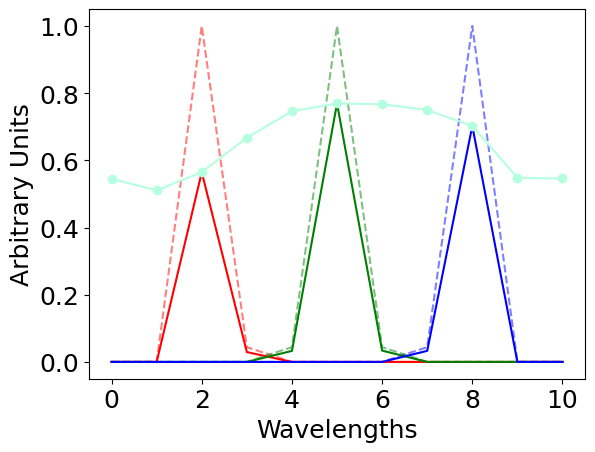

In [50]:
wavelengths = np.arange(11)
sigCa=wavel8542[1]-wavel8542[0]
print(round(0.5*(len(wavel8542)-1)))
filt8542 = cp.filter(wavel8542, 'normal', [[wavel8542[2],0.2*sigCa], [wavel8542[round(0.5*(len(wavel8542)-1))],0.2*sigCa], [wavel8542[-2-1],0.2*sigCa]])
Cair93_filt = cp.filter(wavelengths, 'normal', [[2.5,0.5], [5,0.4], [7.5,0.5]])
print(np.shape(filt8542))
cp.filtplot(datacube8542[0,0,:,500,500], filt8542)
#cp.filtplot(datacube8542[0,0,:,500,500], Cair93_filt)

In [12]:
###On first run, uncomment this and run with your desired save destination included
#for i in range(np.shape(datacube8542)[0]):
#    widthl=4
#    fill='0'
#    linestr=f'{i:{fill}{widthl}}'
#    image=cp.plot(np.nan_to_num(datacube8542[i,0]), filt8542, name="/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X2-2/CaII8542/X2-2_Ca8542_coco_"+linestr+".png", show=False)
#    # remove name, then add plotscript using "image"
#    plt.clf()
i=141
image=cp.plot(np.nan_to_num(datacube8542[i,0]), filt8542)

<IPython.core.display.Javascript object>

In [13]:
i=0
minv=np.min(np.nan_to_num(datacube8542[i,-1]))
print(minv)

-1.1903061e-08


In [14]:
###On first run, uncomment this and run with your desired save destination included
#for i in range(np.shape(datacube8542)[0]):
#    widthl=4
#    fill='0'
#    linestr=f'{i:{fill}{widthl}}'
#    image=cp.plot(np.nan_to_num(datacube8542[i,-1]-minv), filt8542, name="/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X2-2/CaII8542V/X2-2_Ca8542V_coco_"+linestr+".png", show=False)
#    # remove name, then add plotscript using "image"
#    plt.clf()


In [15]:
minq=np.min(np.nan_to_num(datacube8542[i,1]))
print(minq)

-4.420872e-09


In [16]:
###On first run, uncomment this and run with your desired save destination included
#for i in range(np.shape(datacube8542)[0]):
#    widthl=4
#    fill='0'
#    linestr=f'{i:{fill}{widthl}}'
#    image=cp.plot(np.nan_to_num(datacube8542[i,1]-minq), filt8542, name="/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X2-2/CaII8542Q/X2-2_Ca8542Q_coco_"+linestr+".png", show=False)
#    # remove name, then add plotscript using "image"
#    plt.clf()
#

In [17]:
minu=np.min(np.nan_to_num(datacube8542[i,2]))
print(minu)

-4.4843076e-09


In [18]:
###On first run, uncomment this and run with your desired save destination included
#for i in range(np.shape(datacube8542)[0]):
#    widthl=4
#    fill='0'
#    linestr=f'{i:{fill}{widthl}}'
#    image=cp.plot(np.nan_to_num(datacube8542[i,2]-minu), filt8542, name="/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X2-2/CaII8542U/X2-2_Ca8542U_coco_"+linestr+".png", show=False)
#    # remove name, then add plotscript using "image"
#    plt.clf()


In [19]:
##linpol=copy.deepcopy(np.sqrt(datacube8542[:,1]**2+datacube8542[:,2]**2))
#linpol=np.load("linpol.npy")
#print(np.shape(linpol))

In [20]:
#minlin=np.min(linpol)
#print(minlin)

In [21]:
#np.save("linpol", linpol)

In [22]:
#minlin=np.min(np.nan_to_num(linpol))
#print(minlin)
##minlin=0.0

In [23]:
###On first run, uncomment this and run with your desired save destination included
#for i in range(201):
##for i in range(2):
#    widthl=4
#    fill='0'
#    linestr=f'{i:{fill}{widthl}}'
#    image=cp.plot(np.nan_to_num(linpol[i,:]), filt8542, name="/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X2-2/CaII8542linpol/X2-2_Ca8542linpol_coco_"+linestr+".png", show=False)
#    # remove name, then add plotscript using "image"
#    plt.clf()


<h2>Ca II K</h2>

In [24]:
openfile="nb_3950_2017-09-06T09_04_20_09_04_20=0-399_mixed_corrected_im.fits"
datacube3950=f.getdata(openfile)
print(np.shape(datacube3950))

(400, 1, 20, 1936, 1681)


In [25]:
wavelengths = np.arange(np.shape(datacube3950)[2]-1)
filt3950 = cp.filter(wavelengths, 'normal', [[6,0.75], [9,0.75], [12,0.75]])
print(np.shape(filt3950))
cp.filtplot(datacube3950[0,0,0:(np.shape(datacube3950)[2]-1),300,300], filt3950)

(19, 3)


<IPython.core.display.Javascript object>

In [26]:
###On first run, uncomment this and run with your desired save destination included
#for i in range(np.shape(datacube3950)[0]):
#    widthl=4
#    fill='0'
#    linestr=f'{i:{fill}{widthl}}'
#    image=cp.plot(np.nan_to_num(datacube3950[i,0,0:(np.shape(datacube3950)[2]-1)]), filt3950, name="/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X2-2/CaIIK3950/X2-2_CaIIK_coco_"+linestr+".png", show=False)
#    # remove name, then add plotscript using "image"
#    plt.clf()


In [27]:
wavelengths = np.arange(np.shape(datacube3950)[2])
filt3950 = cp.filter(wavelengths, 'single', [[19], [19], [19]])
print(np.shape(filt3950))

Applying "single" filter for R=[19], G=[19], B=[19]
(20, 3)


In [28]:
###On first run, uncomment this and run with your desired save destination included
#for i in range(np.shape(datacube3950)[0]):
#    widthl=4
#    fill='0'
#    linestr=f'{i:{fill}{widthl}}'
#    image=cp.plot(np.nan_to_num(datacube3950[i,0,0:(np.shape(datacube3950)[2])]), filt3950, name="/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X2-2/CaIIKcont/X2-2_CaIIKcont_coco_"+linestr+".png", show=False)
#    # remove name, then add plotscript using "image"
#    plt.clf()


<h2>Now Figures</h2>

<h2>X2.2</h2>

In [29]:
from ISPy.io import solarnet

In [30]:
openfile="nb_6563_2017-09-06T09_04_20_09_04_20=0-200_mixed_corrected_im.fits"
Ha_data=f.getdata(openfile)
Ha_time = solarnet.get_time(openfile, fulltime=False, utc=True)
Ha000_tstr=(f"H\u03B1 t={Ha_time[0][0:-7]} UT")
Ha030_tstr=(f"H\u03B1 t={Ha_time[30][0:-7]} UT")
Ha_wavel = solarnet.get_wav(openfile)
Ha_extent = solarnet.get_extent(openfile)
[Ha_xmin, Ha_ymin] = solarnet.get_coord(openfile, 0,0)
[Ha_xmax, Ha_ymax] = solarnet.get_coord(openfile, np.shape(Ha_data)[-2]-1, np.shape(Ha_data)[-1]-1)
wavelengths = np.arange(np.shape(Ha_data)[2])
Ha_filt = cp.filter(wavelengths, 'normal', [[10,1.25], [6,1], [2,1.25]])
print(np.min(np.nan_to_num(Ha_data[0,0])), np.min(np.nan_to_num(Ha_data[30,0])), np.max(np.nan_to_num(Ha_data[0,0])), np.max(np.nan_to_num(Ha_data[30,0])))
Ha_thresh=[1e-10,1e-7]
i=0
cube = np.nan_to_num(Ha_data[i,0].copy())
cube[np.where(cube > Ha_thresh[1])] = Ha_thresh[1]
cube[np.where(cube < Ha_thresh[0])] = Ha_thresh[0]
base=1.1
cube=np.log(cube*(10**9))/np.log(base)
Ha_000=cp.plot(cube.copy(), Ha_filt, show=False)
v0 = Ha_000[0,0]
mask = np.all(Ha_000 == v0, axis=-1)
Ha_000[mask] = [255,255,255]
i=30
cube = np.nan_to_num(Ha_data[i,0].copy())
cube[np.where(cube > Ha_thresh[1])] = Ha_thresh[1]
cube[np.where(cube < Ha_thresh[0])] = Ha_thresh[0]
base=1.1
cube=np.log(cube*(10**9))/np.log(base)
Ha030_tstr=(f"H\u03B1 t={Ha_time[i][0:-7]} UT")
Ha_030=cp.plot(cube.copy(), Ha_filt, show=False)
v0 = Ha_030[0,0]
mask = np.all(Ha_030 == v0, axis=-1)
Ha_030[mask] = [255,255,255]
#cube = Ha_data[i,0].copy()
#cube[np.where(cube > Ha_thresh[1])] = Ha_thresh[1]
#cube[np.where(cube < Ha_thresh[0])] = Ha_thresh[0]
#Ha_030=cp.plot(np.nan_to_num(cube), Ha_filt, show=False)
#Ha_030=cp.plot(np.nan_to_num(Ha_data[i,0]), Ha_filt, show=False, threshold=Ha_thresh)
print(np.shape(Ha_000))
print(np.shape(Ha_filt))
print(np.shape(Ha_data))
print(np.shape(Ha_time))
print(Ha000_tstr, Ha030_tstr)
print(np.shape(Ha_wavel))
print(np.shape(Ha_data)[-2], np.shape(Ha_data)[-1])
print(Ha_extent)
print("extent ratio =", (Ha_extent[3]-Ha_extent[2])/(Ha_extent[1]-Ha_extent[0]))
print(Ha_xmin, Ha_xmax, Ha_ymin, Ha_ymax)

0.0 0.0 1.0423959e-07 9.4745744e-08
(1200, 1287, 3)
(13, 3)
(201, 1, 13, 1200, 1287)
(201,)
Hα t=09:04:23 UT Hα t=09:11:52 UT
(13,)
1200 1287
[482.771976386034, 558.903176386034, -248.70280933060704, -177.72200933060705]
extent ratio = 0.9323483670295484
482.771976386034 553.697624249282 -248.70280933060704 -177.72200933060705


In [31]:
openfile="nb_8542_2017-09-06T09_04_20_09_04_20=0-200_mixed_stokes_corrected_im.fits"
Cair_data=f.getdata(openfile)
Cair_time = solarnet.get_time(openfile, fulltime=False, utc=True)
Cair000_tstr=(f"Ca II 8542 t={Cair_time[0][0:-7]} UT")
Cair020_tstr=(f"Ca II 8542 t={Cair_time[20][0:-7]} UT")
Cair_wavel = np.squeeze(np.array(solarnet.get_wav(openfile)))
Cair_extent = solarnet.get_extent(openfile)
[Cair_xmin, Cair_ymin] = solarnet.get_coord(openfile, 0,0)
[Cair_xmax, Cair_ymax] = solarnet.get_coord(openfile, np.shape(Cair_data)[-2]-1,np.shape(Cair_data)[-1]-1)
Cair_extent=[Cair_xmin+15, Cair_xmax+15, Cair_ymin, Cair_ymax] #Manual based on HMI image below
wavelengths = np.arange(np.shape(Cair_data)[2])
Cair_filt = cp.filter(wavelengths, 'normal', [[1.75,1.0], [5,1.0], [8.25,1.0]])
minv=np.min(np.nan_to_num(Cair_data[i,-1]))
print(minv)
i=0
Cair_000_raw=Cair_data[i,3]
print(np.shape(Cair_000_raw))
print(np.shape(Cair_wavel))
Cair_000=np.trapz(Cair_000_raw,Cair_wavel,axis=0)
print(np.shape(Cair_000))
#Cair_000=cp.plot(np.nan_to_num(Cair_data[i,3])-minv, Cair_filt, show=False)
i=20
Cair_020_raw=Cair_data[i,3]
Cair_020=np.trapz(Cair_020_raw,Cair_wavel,axis=0)
#Cair_020=cp.plot(np.nan_to_num(Cair_data[i,3])-minv, Cair_filt, show=False)
print(np.shape(Cair_data))
print(np.shape(Cair_time))
print(Cair000_tstr, Cair020_tstr)
print(np.shape(Cair_wavel))
print(np.shape(Cair_data)[-2],np.shape(Cair_data)[-1])
print(Cair_extent)
print(Cair_xmin, Cair_xmax, Cair_ymin, Cair_ymax)
print(np.min(np.nan_to_num(Cair_000)), np.min(np.nan_to_num(Cair_020)), np.max(np.nan_to_num(Cair_000)), np.max(np.nan_to_num(Cair_020)))
Cair_saturate=1e-10

-1.2809788e-08
(11, 1204, 1291)
(11,)
(1204, 1291)
(201, 4, 11, 1204, 1291)
(201,)
Ca II 8542 t=09:04:30 UT Ca II 8542 t=09:09:29 UT
(11,)
1204 1291
[489.73961908811344, 560.9020544095697, -269.03211890965395, -197.81451890965394]
474.73961908811344 545.9020544095697 -269.03211890965395 -197.81451890965394
-2.5951696958126747e-10 -2.4749744281801626e-10 1.707106778166882e-10 2.9800266032653277e-10


In [32]:
openfile="nb_3950_2017-09-06T09_04_20_09_04_20=0-399_mixed_corrected_im.fits"
Cak_data=f.getdata(openfile)
xyratio=np.shape(Ha_data)[-1]/np.shape(Ha_data)[-2]
yrangeim=int(np.round(np.shape(Cak_data)[-1]/xyratio))
Cak_data=Cak_data[:,:,:,0:yrangeim,:]
CakLine_data=Cak_data[:,:,0:-1,:,:]
Cak_time = solarnet.get_time(openfile, fulltime=False, utc=True)
Cak060_tstr=(f"Ca II K t={Cak_time[60][0:-7]} UT")
Cak_wavel = solarnet.get_wav(openfile)
Cak_extent = solarnet.get_extent(openfile)
Cak_extent[3]=Cak_extent[2]+(Cak_extent[3]-Cak_extent[2])/xyratio
[Cak_xmin, Cak_ymin] = solarnet.get_coord(openfile, 0,0)
[Cak_xmax, Cak_ymax] = solarnet.get_coord(openfile, np.shape(Cak_data)[-2]-1,yrangeim-1)
Cak_range=[492,552,-259,-201] #Manually checked using HMI graph below
wavelengths = np.arange(np.shape(Cak_data)[2]-1) # exclude continuum point from filter
Cak_filt = cp.filter(wavelengths, 'normal', [[6,0.75], [9,0.75], [12,0.75]])
wavelengths = np.arange(np.shape(Cak_data)[2])
CakCont_filt = cp.filter(wavelengths, 'single', [[np.shape(Cak_data)[2]-1], [np.shape(Cak_data)[2]-1], [np.shape(Cak_data)[2]-1]])
i=60
Cak060=cp.plot(np.nan_to_num(CakLine_data[i,0]), Cak_filt, show=False)
# Cak060= Cak060[np.where(Cak060 == Cak060[0,0])] = [255,255,255]
v0 = Cak060[0,0]
mask = np.all(Cak060 == v0, axis=-1)
Cak060[mask] = [255,255,255]
i=40
CakCont040=np.squeeze(np.array(Cak_data[i,0,19,:,:]))
CakCont040_tstr=(f"Ca II K cont t={Cak_time[i][0:-7]} UT")
print(np.shape(CakLine_data))
print(np.shape(Cak_time))
print(CakCont040_tstr, Cak060_tstr)
print(np.shape(Cak_wavel))
print(np.shape(Cak_data)[-2],np.shape(Cak_data)[-1])
print(Cak_extent)
print(xyratio)
print("extent ratio =", (Cak_extent[3]-Cak_extent[2])/(Cak_extent[1]-Cak_extent[0]))
print(Cak_xmin, Cak_xmax, Cak_ymin, Cak_ymax)
print(np.shape(CakCont040))
print(np.shape(Cak060))
print(Cair_extent[0]+0.1*(Cair_extent[1]-Cair_extent[0]), Cair_extent[2]+0.8*(Cair_extent[3]-Cair_extent[2]))

Applying "single" filter for R=[19], G=[19], B=[19]
(400, 1, 19, 1567, 1681)
(400,)
Ca II K cont t=09:09:34 UT Ca II K t=09:12:18 UT
(20,)
1567 1681
[478.34318810325897, 542.015188103259, -260.7608434267452, -192.38182244772423]
1.0725
extent ratio = 1.0739260739260736
478.34318810325897 537.6592809051626 -260.7608434267452 -201.44010014162123
(1567, 1681)
(1567, 1681, 3)
496.8558626202591 -212.05803890965393


In [33]:
openfile="hmi_ic_45s_20170906_090515_TAI_2_continuum.fits"
HMI_data=f.getdata(openfile)
#HMI_extent = solarnet.get_extent(openfile)
np.shape(HMI_data)

(4096, 4096)

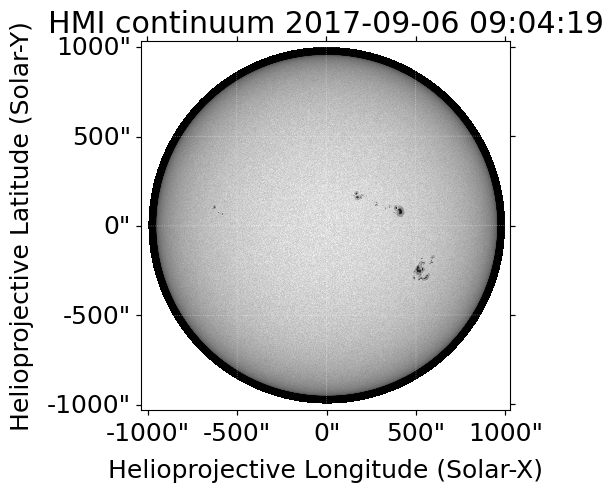

In [39]:
%matplotlib inline
import sunpy.map
import astropy.units as u
from sunpy.data.sample import HMI_LOS_IMAGE
magnetogram_big = sunpy.map.Map('hmi_ic_45s_20170906_090515_TAI_2_continuum.fits')
aa = magnetogram_big.rotate(angle=180 * u.deg)

aa.plot()
plt.show()

In [54]:
np.shape(Cair_000), Cair_000[0:1204:100, 0:1291:100]

((1204, 1291),
 array([[            nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan],
        [            nan,             nan,             nan,
                     nan,             nan,             nan,
                     nan, -3.24279938e-12, -2.45347151e-12,
         -6.23991213e-12,             nan,             nan,
                     nan],
        [            nan,             nan,             nan,
          4.03533970e-12,  3.13389686e-11, -1.22067248e-11,
          2.27528593e-12, -3.19118620e-12, -2.74245576e-12,
         -6.94742527e-13,             nan,             nan,
                     nan],
        [            nan, -5.05409686e-12, -2.57577146e-11,
          9.11474729e-12, -2.15316850e-11,  2.46941793e-12,
         -1.30187749e-12,  1.98212839e-12, -3.28951456e-12,
    

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


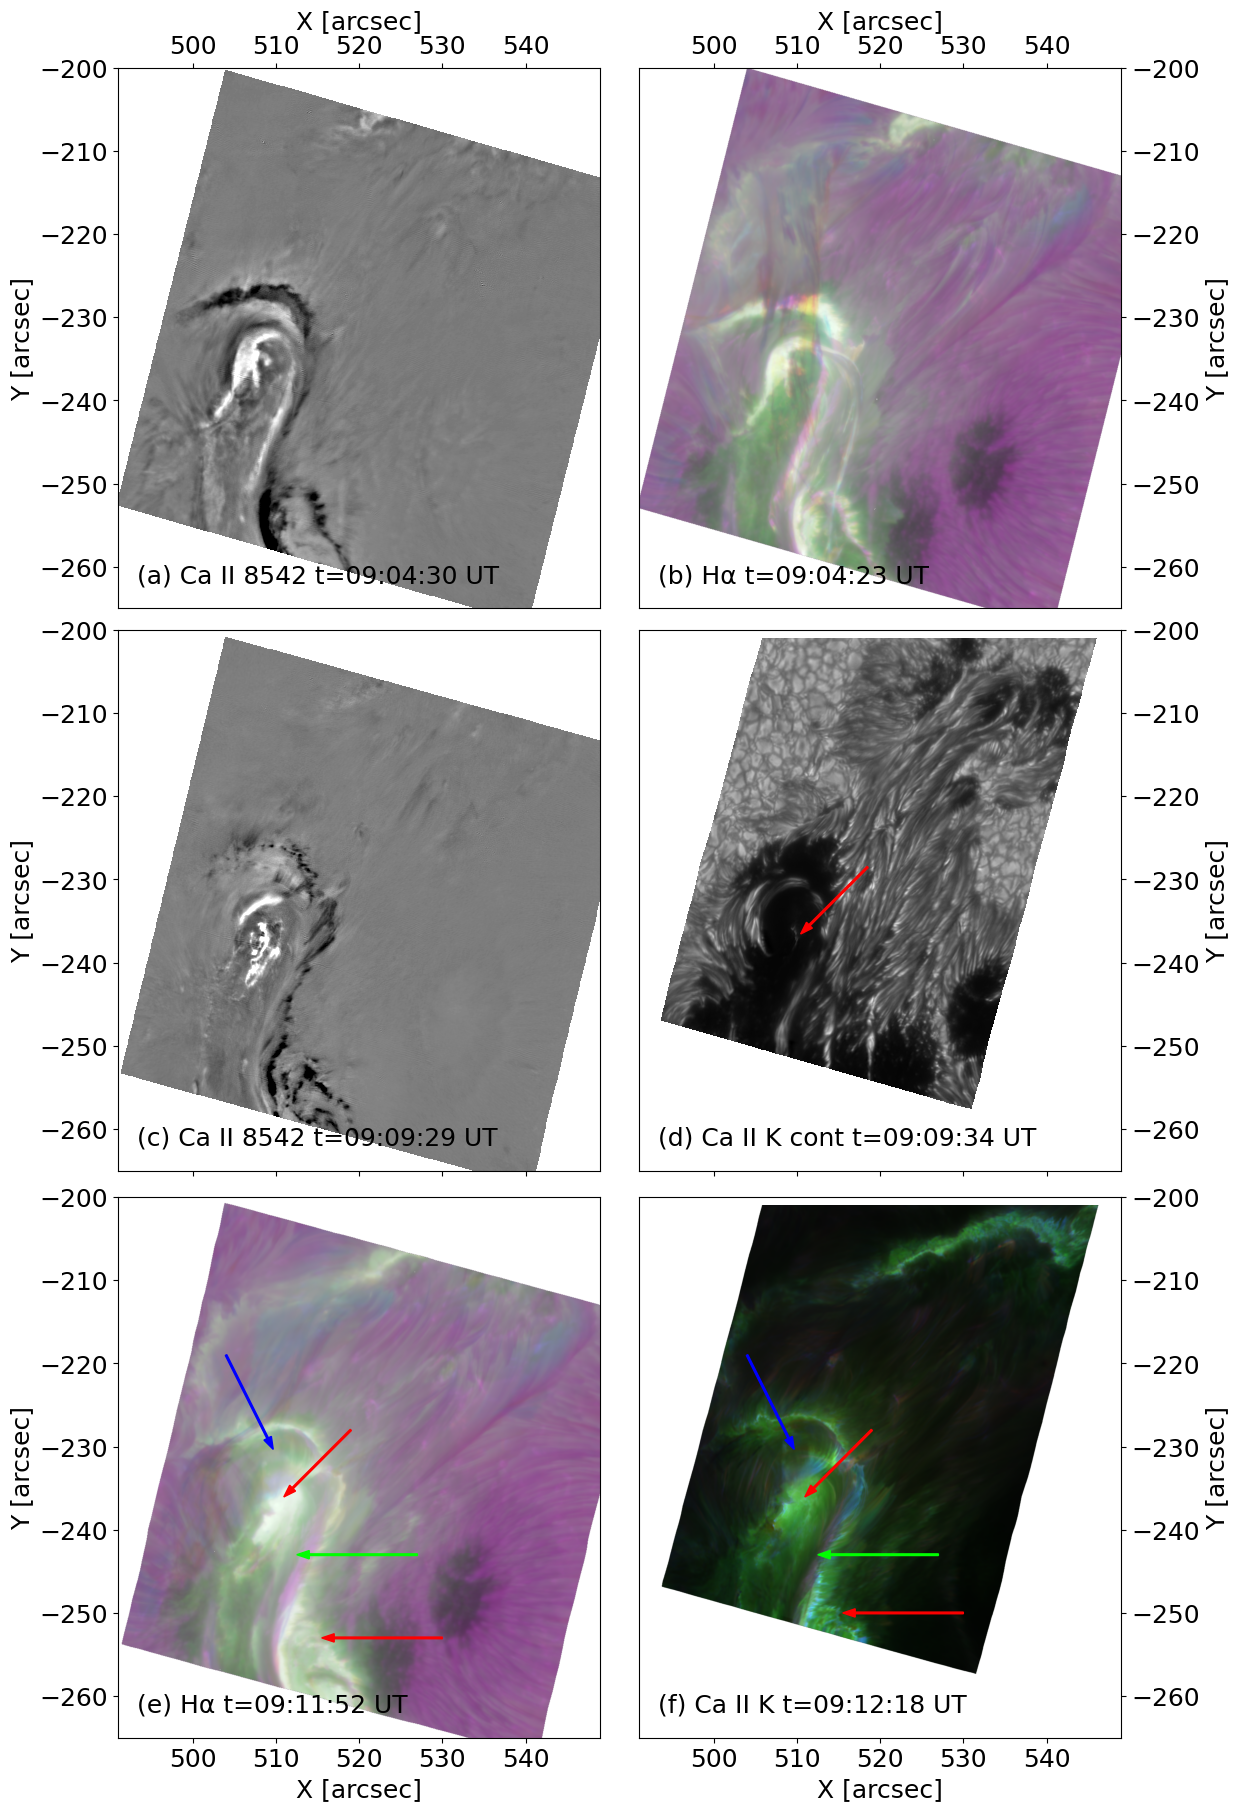

In [51]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(3, 2,figsize=(12.15, 18), constrained_layout=True)#,gridspec_kw = {'wspace':0,'hspace':0})#,sharey='row',sharex='col')

xlims=[491, 549]
ylims=[-265, -200]
ax[0,0].imshow(Cair_000, cmap='gray', origin='lower', extent=Cair_extent, vmin=-Cair_saturate, vmax=Cair_saturate)
ax[0,0].annotate("(a) "+Cair000_tstr, xy=(Cair_extent[0]+0.05*(Cair_extent[1]-Cair_extent[0]), Cair_extent[2]+0.1*(Cair_extent[3]-Cair_extent[2])), color='black')
#ax[0,0].annotate(Cair000_tstr, xy=(0.15,0.9), xycoords='subfigure fraction', color='white')
ax[0,0].xaxis.set_label_position("top")
ax[0,0].xaxis.tick_top()
ax[0,0].set_ylabel('Y [arcsec]')
ax[0,0].set_xlabel('X [arcsec]')
ax[0,0].set_xlim(xlims)
ax[0,0].set_ylim(ylims)


ax[0,1].imshow(Ha_000, origin='lower', extent=Cair_extent)
ax[0,1].annotate("(b) "+Ha000_tstr, xy=(Cair_extent[0]+0.05*(Cair_extent[1]-Cair_extent[0]), Cair_extent[2]+0.1*(Cair_extent[3]-Cair_extent[2])), color='black')
ax[0,1].xaxis.set_label_position("top")
ax[0,1].xaxis.tick_top()
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_ylabel('Y [arcsec]')
ax[0,1].set_xlabel('X [arcsec]')
ax[0,1].set_xlim(xlims)
ax[0,1].set_ylim(ylims)

ax[1,0].imshow(Cair_020, cmap='gray', origin='lower', extent=Cair_extent, vmin=-Cair_saturate, vmax=Cair_saturate)
ax[1,0].annotate("(c) "+Cair020_tstr, xy=(Cair_extent[0]+0.05*(Cair_extent[1]-Cair_extent[0]), Cair_extent[2]+0.1*(Cair_extent[3]-Cair_extent[2])), color='black')
#ax[1,0].annotate(Cair020_tstr, xy=(0.15,0.9), xycoords='figure fraction', color='white')
#ax[1,0].xaxis.set_label_position("top")
#ax[1,0].xaxis.tick_top()
ax[1,0].set_ylabel('Y [arcsec]')
ax[1,0].set_xticklabels('')
ax[1,0].set_xlim(xlims)
ax[1,0].set_ylim(ylims)


ax[1,1].imshow(CakCont040, cmap='gray', origin='lower', extent=Cak_range)
ax[1,1].annotate("(d) "+CakCont040_tstr, xy=(Cair_extent[0]+0.05*(Cair_extent[1]-Cair_extent[0]), Cair_extent[2]+0.1*(Cair_extent[3]-Cair_extent[2])), color='black')
#ax[1,1].xaxis.set_label_position("top")
#ax[1,1].xaxis.tick_top()
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[1,1].set_ylabel('Y [arcsec]')
ax[1,1].set_xticklabels('')
ax[1,1].set_xlim(xlims)
ax[1,1].set_ylim(ylims)
ax[1,1].arrow(511.5+7, -235.5+7, -7, -7, color=[1,0,0], width=0.2, head_width=1)


ax[2,0].imshow(Ha_030, origin='lower', extent=Cair_extent)
ax[2,0].annotate("(e) "+Ha030_tstr, xy=(Cair_extent[0]+0.05*(Cair_extent[1]-Cair_extent[0]), Cair_extent[2]+0.1*(Cair_extent[3]-Cair_extent[2])), color='black')
ax[2,0].xaxis.set_label_position("bottom")
ax[2,0].xaxis.tick_bottom()
ax[2,0].yaxis.set_label_position("left")
ax[2,0].yaxis.tick_left()
ax[2,0].set_ylabel('Y [arcsec]')
ax[2,0].set_xlabel('X [arcsec]')
ax[2,0].set_xlim(xlims)
ax[2,0].set_ylim(ylims)
ax[2,0].arrow(509-5, -229+10, 5, -10, color=[0,0,1], width=0.2, head_width=1)
ax[2,0].arrow(512+7, -235+7, -7, -7, color=[1,0,0], width=0.2, head_width=1)
ax[2,0].arrow(517+13, -253+0, -13, 0, color=[1,0,0], width=0.2, head_width=1)
ax[2,0].arrow(514+13, -243+0, -13, 0, color=[0,1,0], width=0.2, head_width=1)


ax[2,1].imshow(Cak060, origin='lower', extent=Cak_range)
ax[2,1].annotate("(f) "+Cak060_tstr, xy=(Cair_extent[0]+0.05*(Cair_extent[1]-Cair_extent[0]), Cair_extent[2]+0.1*(Cair_extent[3]-Cair_extent[2])), color='Black')
ax[2,1].xaxis.set_label_position("bottom")
ax[2,1].xaxis.tick_bottom()
ax[2,1].yaxis.set_label_position("right")
ax[2,1].yaxis.tick_right()
ax[2,1].set_ylabel('Y [arcsec]')
ax[2,1].set_xlabel('X [arcsec]')
ax[2,1].set_xlim(xlims)
ax[2,1].set_ylim(ylims)
ax[2,1].arrow(509-5, -229+10, 5, -10, color=[0,0,1], width=0.2, head_width=1)
ax[2,1].arrow(512+7, -235+7, -7, -7, color=[1,0,0], width=0.2, head_width=1)
ax[2,1].arrow(517+13, -250+0, -13, 0, color=[1,0,0], width=0.2, head_width=1)
ax[2,1].arrow(514+13, -243+0, -13, 0, color=[0,1,0], width=0.2, head_width=1)

# plt.savefig("/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X2-2/X2-2_context.png")
# plt.savefig("/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X2-2/X2-2_context.pdf")
# plt.savefig("/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X2-2/X2-2_context.eps")

plt.show()

<h2>X9.3</h2>

In [41]:
from ISPy.io import solarnet

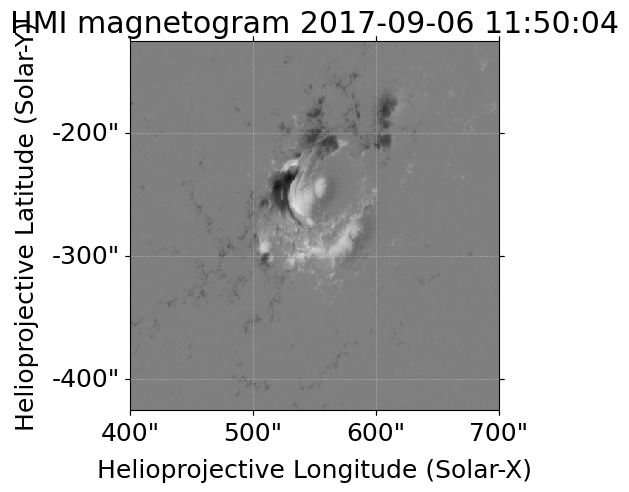

In [42]:
import sunpy.map
import astropy.units as u
from sunpy.data.sample import HMI_LOS_IMAGE
magnetogram_big = sunpy.map.Map('hmi_2017-09-06T11_50_04_500_magnetogram.fits')
#aa = magnetogram_big.rotate(angle=180 * u.deg)

magnetogram_big.plot()
plt.show()

In [43]:
openfile="nb_6563_2017-09-06T11_55_47_scans=3-215_im.fits"
Ha93_data=f.getdata(openfile)

from scipy.io import readsav as rs

Ha93_spectfile = rs('spectfile6563_93.idlsave')
Ha93_wavel=Ha93_spectfile["spect_pos"]
print(np.shape(Ha93_wavel))
print(Ha93_wavel)
Ha93_tfile= rs("times6563_93_2017_09_06_11_55_47.idlsave")
#print(Ha93_tfile)
Ha93_time=Ha93_tfile["times"]
print(np.shape(Ha93_time))
Ha93_t=Ha93_time[3:216]
#print(Ha93_t)
Ha93_thresh=[0,2e-7]

wavelengths = np.arange(np.shape(Ha93_data)[2])
Ha93_filt = cp.filter(wavelengths, 'normal', [[10,1.25], [6,1], [2,1.25]])
i=40
cube = np.nan_to_num(Ha93_data[i,0].copy())
cube[np.where(cube > Ha93_thresh[1])] = Ha93_thresh[1]
cube[np.where(cube < Ha93_thresh[0])] = Ha93_thresh[0]
Ha_040_tstr=(f"H\u03B1 t={Ha93_time[i][0:-7]} UT")
Ha_040_tstr=Ha_040_tstr[0:5]+Ha_040_tstr[7:15]+Ha_040_tstr[16:]
Ha_040=cp.plot(cube.copy(), Ha93_filt, show=False)
#Ha_040=cp.plot(np.nan_to_num(Ha93_data[i,0]), Ha93_filt, show=False)
#v0 = Ha_040[10,10]
#mask = np.all(Ha_040 == v0, axis=-1)
#Ha_040[mask] = [255,255,255]
#v0 = Ha_040[0,0]
#mask = np.all(Ha_040 == v0, axis=-1)
#Ha_040[mask] = [255,255,255]
print(np.shape(Ha_040))
print(np.shape(Ha93_filt))
print(np.shape(Ha93_data))
#print(np.shape(Ha93_time))
print(Ha_040_tstr)
#print(np.shape(Ha93_wavel))
print(np.shape(Ha93_data)[-2], np.shape(Ha93_data)[-1])
#print(Ha93_extent)
#print(Ha93_xmin, Ha93_xmax, Ha93_ymin, Ha93_ymax)

 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


(13,)
[6561.49999988 6562.         6562.19999999 6562.39999998 6562.69999999
 6562.84999999 6563.         6563.15000001 6563.30000001 6563.60000002
 6563.80000001 6564.         6564.50000012]
(226,)
(1038, 1079, 3)
(13, 3)
(213, 1, 13, 1038, 1079)
Hα t=12:05:48 UT
1038 1079


In [44]:
print(np.nan_to_num(np.max(Ha93_data[0,0])))

2.3090543e-07


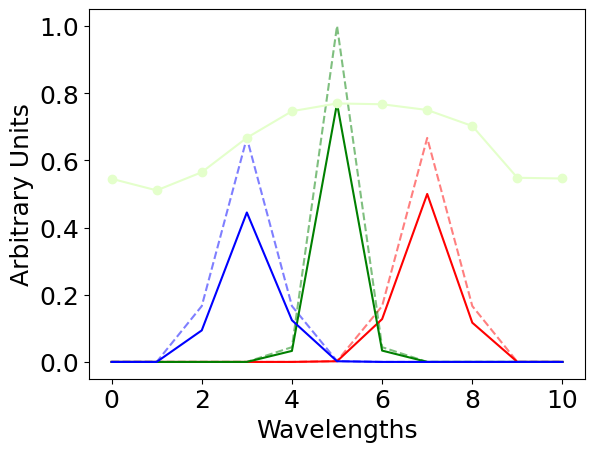

(11, 3)
0.9999999999999999
1.0000000000000002
1.0


In [45]:
spectfile="spectfile8542_93.idlsave"
wavefile8542=readsav(spectfile, verbose=False)
wavel8542=wavefile8542.spect_pos
#wavelengths = np.arange(11)
sigCa=wavel8542[1]-wavel8542[0]
#print(round(0.5*(len(wavel8542)-1)))
filt8542 = cp.filter(wavel8542, 'normal', [[(wavel8542[-4]),0.3*sigCa], [wavel8542[round(0.5*(len(wavel8542)-1))],0.2*sigCa], [wavel8542[3],0.3*sigCa]])
cp.filtplot(datacube8542[0,0,:,500,500], filt8542)
filt8542[:,0]=filt8542[:,0]/np.sum(filt8542[:,0])
filt8542[:,1]=filt8542[:,1]/np.sum(filt8542[:,1])
filt8542[:,2]=filt8542[:,2]/np.sum(filt8542[:,2])
print(np.shape(filt8542))
print(np.sum(filt8542[:,0]))
print(np.sum(filt8542[:,1]))
print(np.sum(filt8542[:,2]))

In [46]:
i=60
st=1

openfile="nb_6563_2017-09-06T11_55_47_scans=3-215_im.fits"
Ha93_data=f.getdata(openfile)


cube = np.nan_to_num(Cair93_data[i,st].copy())
#cube = np.sqrt(np.nan_to_num(Cair93_data[i,1].copy())**2+np.nan_to_num(Cair93_data[i,2].copy())**2)
cube = np.sqrt(np.nan_to_num(Cair93_data[i,3].copy())**2)
cube[np.where(cube > Cair93_thresh[1])] = Cair93_thresh[1]
cube[np.where(cube < Cair93_thresh[0])] = Cair93_thresh[0]
Cair017_tstr=(f"Ca II 8542 t={Cair93_t[i][0:-7]} UT")
Cair017_tstr=Cair017_tstr[0:13]+Cair017_tstr[15:23]+Cair017_tstr[24:]
image=cp.plot(np.nan_to_num(cube), filt8542)

NameError: name 'Cair93_data' is not defined

In [ ]:
i=141
st=3
cube = np.nan_to_num(Cair93_data[i,st].copy())
print(np.shape(cube))
print(np.shape(wavel8542))
circpol = np.trapz(np.sqrt(cube**2), x=wavel8542, axis=0)
print(np.shape(circpol))
image=plt.imshow(circpol, origin="lower", cmap="Greys_r")
plt.colorbar()
plt.show()

NameError: name 'Cair93_data' is not defined

In [ ]:
from scipy.io import readsav as rs

openfile="nb_8542_2017-09-06T11_55_47_scans=3-215_stokes_corrected_im_new.fits"
Cair93_data=f.getdata(openfile)

Cair93_spectfile = rs('spectfile8542_93.idlsave')
Cair93_wavel=Cair93_spectfile["spect_pos"]
print(np.shape(Cair93_wavel))
print(Cair93_wavel)
Cair93_tfile= rs("times8542_93_2017_09_06_11_55_47.idlsave")
#print(Cair93_tfile)
Cair93_time=Cair93_tfile["times"]
print(np.shape(Cair93_time))
Cair93_t=Cair93_time[3:216]
#print(Cair93_t)
Cair93_thresh=[1e-10,2e-7]

Cair_sig=Cair93_wavel[1]-Cair93_wavel[0]
Cair_size=len(Cair93_wavel)
b=[Cair93_wavel[2],0.2*Cair_sig]
g=[Cair93_wavel[round(0.5*(0+Cair_size))],0.3*Cair_sig]
r=[Cair93_wavel[Cair_size - 1-2],0.2*Cair_sig]
filtertype='normal'
#print(r)
#print(g)
#print(b)
#print(Cair93_wavel)

Cair93_filt = cp.filter(Cair93_wavel, filtertype, [r, g, b])
#print(Cair93_filt)

i=17
cube = np.nan_to_num(Cair93_data[i,0].copy())
cube[np.where(cube > Cair93_thresh[1])] = Cair93_thresh[1]
cube[np.where(cube < Cair93_thresh[0])] = Cair93_thresh[0]
Cair017_tstr=(f"Ca II 8542 t={Cair93_t[i][0:-7]} UT")
Cair017_tstr=Cair017_tstr[0:13]+Cair017_tstr[15:23]+Cair017_tstr[24:]
Cair_017=cp.plot(cube.copy(), Cair93_filt, show=False)
v0 = Cair_017[10,10]
mask = np.all(Cair_017 == v0, axis=-1)
Cair_017[mask] = [255,255,255]
v0 = Cair_017[0,0]
mask = np.all(Cair_017 == v0, axis=-1)
Cair_017[mask] = [255,255,255]
i=40
cube = np.nan_to_num(Cair93_data[i,0].copy())
cube[np.where(cube > Cair93_thresh[1])] = Cair93_thresh[1]
cube[np.where(cube < Cair93_thresh[0])] = Cair93_thresh[0]
Cair040_tstr=(f"Ca II 8542 t={Cair93_t[i][0:-7]} UT")
Cair040_tstr=Cair040_tstr[0:13]+Cair040_tstr[15:23]+Cair040_tstr[24:]
Cair_040=cp.plot(cube.copy(), Cair93_filt, show=False)
v0 = Cair_040[10,10]
mask = np.all(Cair_040 == v0, axis=-1)
Cair_040[mask] = [255,255,255]
v0 = Cair_040[0,0]
mask = np.all(Cair_040 == v0, axis=-1)
Cair_040[mask] = [255,255,255]
#Cair_040=cp.plot(np.nan_to_num(Cair93_data[i,0]), Cair93_filt, show=False)
i=91
cube = np.nan_to_num(Cair93_data[i,0].copy())
cube[np.where(cube > Cair93_thresh[1])] = Cair93_thresh[1]
cube[np.where(cube < Cair93_thresh[0])] = Cair93_thresh[0]
Cair091_tstr=(f"Ca II 8542 t={Cair93_t[i][0:-7]} UT")
Cair091_tstr=Cair091_tstr[0:13]+Cair091_tstr[15:23]+Cair091_tstr[24:]
Cair_091=cp.plot(cube.copy(), Cair93_filt, show=False)
v0 = Cair_091[10,10]
mask = np.all(Cair_091 == v0, axis=-1)
Cair_091[mask] = [255,255,255]
v0 = Cair_091[0,0]
mask = np.all(Cair_091 == v0, axis=-1)
Cair_091[mask] = [255,255,255]
#Cair_091=cp.plot(np.nan_to_num(Cair93_data[i,0]), Cair93_filt, show=False)
i=195
cube = np.nan_to_num(Cair93_data[i,0].copy())
cube[np.where(cube > Cair93_thresh[1])] = Cair93_thresh[1]
cube[np.where(cube < Cair93_thresh[0])] = Cair93_thresh[0]
Cair195_tstr=(f"Ca II 8542 t={Cair93_t[i][0:-7]} UT")
Cair195_tstr=Cair195_tstr[0:13]+Cair195_tstr[15:23]+Cair195_tstr[24:]
Cair_195=cp.plot(cube.copy(), Cair93_filt, show=False)
v0 = Cair_195[10,10]
mask = np.all(Cair_195 == v0, axis=-1)
Cair_195[mask] = [255,255,255]
v0 = Cair_195[0,0]
mask = np.all(Cair_195 == v0, axis=-1)
Cair_195[mask] = [255,255,255]
#Cair_195=cp.plot(np.nan_to_num(Cair93_data[i,0]), Cair93_filt, show=False)
print(np.shape(Cair93_data))

Cair93_extent=[501,577,-282,-214]

 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


(11,)
[8541.3 8541.5 8541.7 8541.8 8541.9 8542.  8542.1 8542.2 8542.3 8542.5
 8542.7]
(226,)
(213, 4, 11, 1038, 1079)


In [ ]:
#print(np.nan_to_num(np.max(Cair93_data[17,0])))
#print(Cair195_tstr[0:13]+Cair195_tstr[15:23]+Cair195_tstr[24:])
#print(Cair195_tstr)

In [ ]:
openfile="nb_3950_2017-09-06T11_55_49_11_55_49=6-399_mixed_corrected_im.fits"
Cak_data=f.getdata(openfile)
CakLine_data=Cak_data[:,:,0:-1,:,:]
Cak_time = solarnet.get_time(openfile, fulltime=False, utc=True)
#CakCont032_tstr=(f"Ca II K continuum t={Cak_time[32][0:-7]} UT")
#Cak060_tstr=(f"Ca II K t={Cak_time[60][0:-7]} UT")
Cak_wavel = solarnet.get_wav(openfile)
Cak_extent = solarnet.get_extent(openfile)
#[Cak_xmin, Cak_ymin] = solarnet.get_coord(openfile, 0,0)
#[Cak_xmax, Cak_ymax] = solarnet.get_coord(openfile, np.shape(Cak_data)[-2]-1,np.shape(Cak_data)[-1]-1)
#wavelengths = np.arange(np.shape(Cak_data)[2]-1) # exclude continuum point from filter
#Cak_filt = cp.filter(wavelengths, 'normal', [[6,0.75], [9,0.75], [12,0.75]])
#wavelengths = np.arange(np.shape(Cak_data)[2])
##CakCont_filt = cp.filter(wavelengths, 'single', [[np.shape(Cak_data)[2]-1], [np.shape(Cak_data)[2]-1], [np.shape(Cak_data)[2]-1]])
#i=60
#Cak060=cp.plot(np.nan_to_num(CakLine_data[i,0]), Cak_filt, show=False)
#i=32
#CakCont032=np.squeeze(np.array(Cak_data[i,0,19,:,:]))
print(np.shape(CakLine_data))
#print(np.shape(CakCont_data))
print(np.shape(Cak_time))
#print(CakCont032_tstr, Cak060_tstr)
#print(np.shape(Cak_wavel))
#print(np.shape(Cak_data)[-2],np.shape(Cak_data)[-1])
#print(Cak_extent)
#print(Cak_xmin, Cak_xmax, Cak_ymin, Cak_ymax)
#print(np.shape(CakCont032))
#print(np.shape(Cak060))

(394, 1, 19, 1713, 1258)
(394,)


In [ ]:
openfile="HMI/hmi_blos_x9.fits"
HMI93_data=f.getdata(openfile)
print(np.shape(HMI93_data))
HMI93_tstr=(f"Magnetogram t= 11:50:04 UT")

(231, 222)


NameError: name 'Cair_017' is not defined

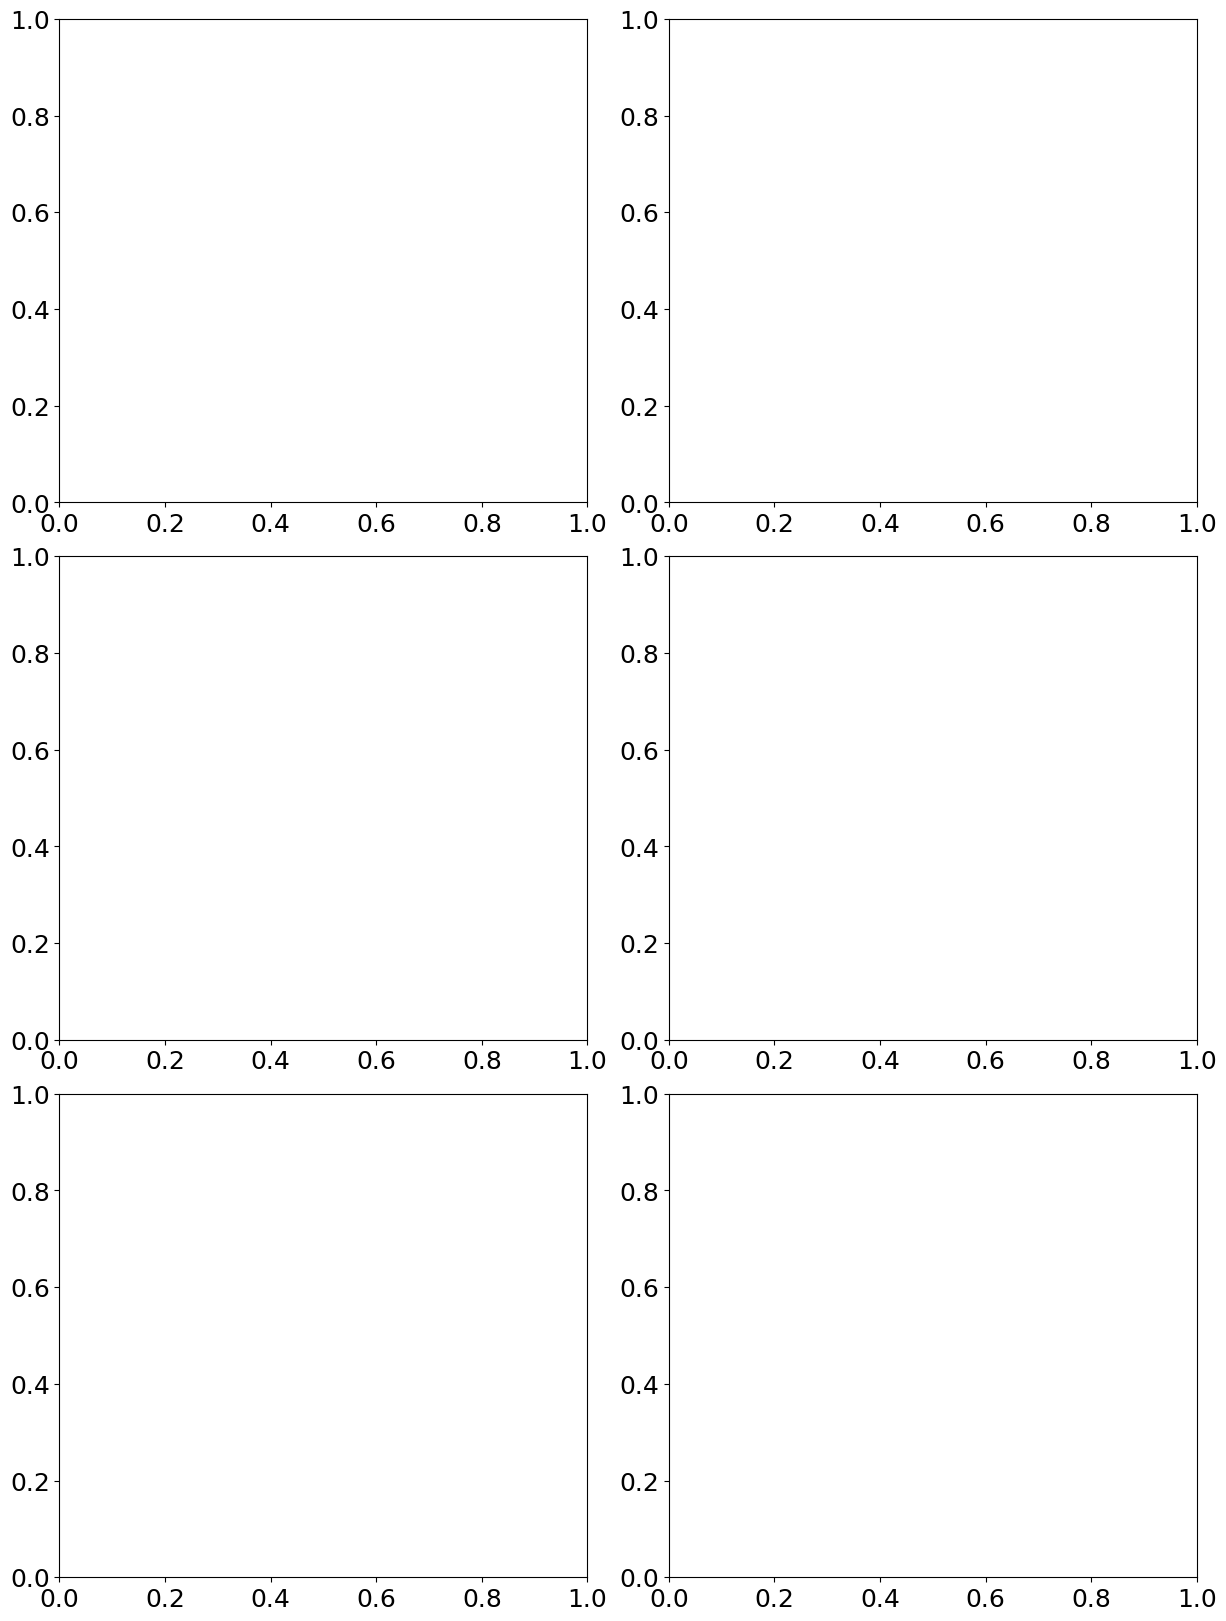

In [47]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

xlims=[505,569]
ylims=[-279,-216]

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(3, 2,figsize=(12.15, 16.1), constrained_layout=True)#,gridspec_kw = {'wspace':0,'hspace':0})#,sharey='row',sharex='col')

ax[0,0].imshow(Cair_017, origin='lower', extent=Cair93_extent)
ax[0,0].annotate("(a) "+Cair017_tstr, xy=(Cair93_extent[0]+0.11*(Cair93_extent[1]-Cair93_extent[0]), Cair93_extent[2]+0.1*(Cair93_extent[3]-Cair93_extent[2])), color='white')
ax[0,0].xaxis.set_label_position("top")
ax[0,0].xaxis.tick_top()
ax[0,0].set_ylabel('y [arcsec]')
ax[0,0].set_xlabel('x [arcsec]')
ax[0,0].set_xlim(xlims)
ax[0,0].set_ylim(ylims)
ax[0,0].arrow(544+7, -230+7, -7, -7, color=[1,0,0], width=0.2, head_width=1)
ax[0,0].arrow(533-10, -242+0, +10, 0, color=[1,0,0], width=0.2, head_width=1)

ax[0,1].imshow(HMI93_data, cmap='gray', origin='lower', extent=Cair93_extent)
ax[0,1].annotate("(b) "+HMI93_tstr, xy=(Cair93_extent[0]+0.11*(Cair93_extent[1]-Cair93_extent[0]), Cair93_extent[2]+0.1*(Cair93_extent[3]-Cair93_extent[2])), color='white')
ax[0,1].xaxis.set_label_position("top")
ax[0,1].xaxis.tick_top()
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_ylabel('y [arcsec]')
ax[0,1].set_xlabel('x [arcsec]')
ax[0,1].set_xlim(xlims)
ax[0,1].set_ylim(ylims)


ax[1,0].imshow(Cair_040, origin='lower', extent=Cair93_extent)
ax[1,0].annotate("(c) "+Cair040_tstr, xy=(Cair93_extent[0]+0.11*(Cair93_extent[1]-Cair93_extent[0]), Cair93_extent[2]+0.1*(Cair93_extent[3]-Cair93_extent[2])), color='white')
ax[1,0].set_ylabel('y [arcsec]')
ax[1,0].set_xticklabels('')
ax[1,0].set_xlim(xlims)
ax[1,0].set_ylim(ylims)
ax[1,0].arrow(525-7, -250+7, +7, -7, color=[1,0,0], width=0.2, head_width=1)
ax[1,0].arrow(530-7, -240+7, +7, -7, color=[1,0,0], width=0.2, head_width=1)
ax[1,0].arrow(533+10, -258, -10, -0, color=[0,0,1], width=0.2, head_width=1)
#ax[1,0].arrow(540.5+7, -252.5+7, -7, -7, color=[0,1,0], width=0.2, head_width=1)
#ax[1,0].arrow(549+7, -264+7, -7, -7, color=[0,1,0], width=0.2, head_width=1)


ax[1,1].imshow(Ha_040, origin='lower', extent=Cair93_extent)
ax[1,1].annotate("(d) "+Ha_040_tstr, xy=(Cair93_extent[0]+0.11*(Cair93_extent[1]-Cair93_extent[0]), Cair93_extent[2]+0.1*(Cair93_extent[3]-Cair93_extent[2])), color='white')
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
ax[1,1].set_ylabel('y [arcsec]')
ax[1,1].set_xticklabels('')
ax[1,1].set_xlim(xlims)
ax[1,1].set_ylim(ylims)
ax[1,1].arrow(525-7, -250+7, +7, -7, color=[1,0,0], width=0.2, head_width=1)
ax[1,1].arrow(530-7, -240+7, +7, -7, color=[1,0,0], width=0.2, head_width=1)
ax[1,1].arrow(533+10, -258, -10, -0, color=[0,0,1], width=0.2, head_width=1)
#ax[1,1].arrow(540.5+7, -252.5+7, -7, -7, color=[0,1,0], width=0.2, head_width=1)
#ax[1,1].arrow(549+7, -264+7, -7, -7, color=[0,1,0], width=0.2, head_width=1)


ax[2,0].imshow(Cair_091, origin='lower', extent=Cair93_extent)
ax[2,0].annotate("(e) "+Cair091_tstr, xy=(Cair93_extent[0]+0.11*(Cair93_extent[1]-Cair93_extent[0]), Cair93_extent[2]+0.1*(Cair93_extent[3]-Cair93_extent[2])), color='white')
ax[2,0].xaxis.set_label_position("bottom")
ax[2,0].xaxis.tick_bottom()
ax[2,0].yaxis.set_label_position("left")
ax[2,0].yaxis.tick_left()
ax[2,0].set_ylabel('y [arcsec]')
ax[2,0].set_xlabel('x [arcsec]')
ax[2,0].set_xlim(xlims)
ax[2,0].set_ylim(ylims)
ax[2,0].arrow(552+10, -262+0, -10, -0, color=[1,0,0], width=0.2, head_width=1)


ax[2,1].imshow(Cair_195, origin='lower', extent=Cair93_extent)
ax[2,1].annotate("(f) "+Cair195_tstr, xy=(Cair93_extent[0]+0.11*(Cair93_extent[1]-Cair93_extent[0]), Cair93_extent[2]+0.1*(Cair93_extent[3]-Cair93_extent[2])), color='white')
ax[2,1].xaxis.set_label_position("bottom")
ax[2,1].xaxis.tick_bottom()
ax[2,1].yaxis.set_label_position("right")
ax[2,1].yaxis.tick_right()
ax[2,1].set_ylabel('y [arcsec]')
ax[2,1].set_xlabel('x [arcsec]')
ax[2,1].set_xlim(xlims)
ax[2,1].set_ylim(ylims)

# plt.savefig("/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X9-3/X9-3_context.png")
# plt.savefig("/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X9-3/X9-3_context.pdf")
# plt.savefig("/home/madr4126/Documents/Work_Notes/codes/IDL/cocoplots/2017_09_06_X9-3/X9-3_context.eps")



plt.show()

In [48]:
def plot_im(image, dpi=80):
    px,py,pc = image.shape # depending of your matplotlib.rc you may  have to use py,px instead
    #px,py = im[:,:,0].shape # if image has a (x,y,z) shape
    size = (py/float(dpi), px/float(dpi)) # note the np.float()
    print(size)
    fig = plt.figure(figsize=size, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1])
    # Customize the axis
    # remove top and right spines
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    # turn off ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])

    ax.imshow(image,origin="lower")
    plt.show()


In [49]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

xlims=[505,569]
ylims=[-279,-216]
Cair_sig=Cair93_wavel[1]-Cair93_wavel[0]
Cair_size=len(Cair93_wavel)
b=[Cair93_wavel[2],0.2*Cair_sig]
g=[Cair93_wavel[round(0.5*(0+Cair_size))],0.3*Cair_sig]
r=[Cair93_wavel[Cair_size - 1-2],0.2*Cair_sig]
filtertype='normal'
#print(r)
#print(g)
#print(b)
#print(Cair93_wavel)
Cair93_filt = cp.filter(Cair93_wavel, filtertype, [r, g, b])
#print(Cair93_filt)
Cair93_thresh=[1e-10,2e-7]

i=60
cube = np.nan_to_num(Cair93_data[i,0].copy())
cube[np.where(cube > Cair93_thresh[1])] = Cair93_thresh[1]
cube[np.where(cube < Cair93_thresh[0])] = Cair93_thresh[0]
Cair_017=cp.plot(cube.copy(), Cair93_filt, show=False)
#v0 = Cair_017[10,10]
#mask = np.all(Cair_017 == v0, axis=-1)
#Cair_017[mask] = [255,255,255]
#v0 = Cair_017[0,0]
#mask = np.all(Cair_017 == v0, axis=-1)
#Cair_017[mask] = [255,255,255]
print(np.shape(Cair_017))
myim=Cair_017[83:-110,170:-160]
myplot=plot_im(myim,dpi=20)
savename="/home/madr4126/Documents/Work_Notes/LaTex/2023_RAS_Meeting_AnG/Article/Send/COCO.pdf"
plt.savefig(savename)
savename="/home/madr4126/Documents/Work_Notes/LaTex/2023_RAS_Meeting_AnG/Article/Send/COCO.png"
plt.savefig(savename)

NameError: name 'Cair93_wavel' is not defined